In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4990 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3778 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3391 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3139 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2952 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2796 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2666 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2577 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2483 - accuracy: 0.9072
Epoc

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2214 - accuracy: 0.8841

Test accuracy: 0.8841


In [9]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

In [10]:
test_labels[0]

9

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

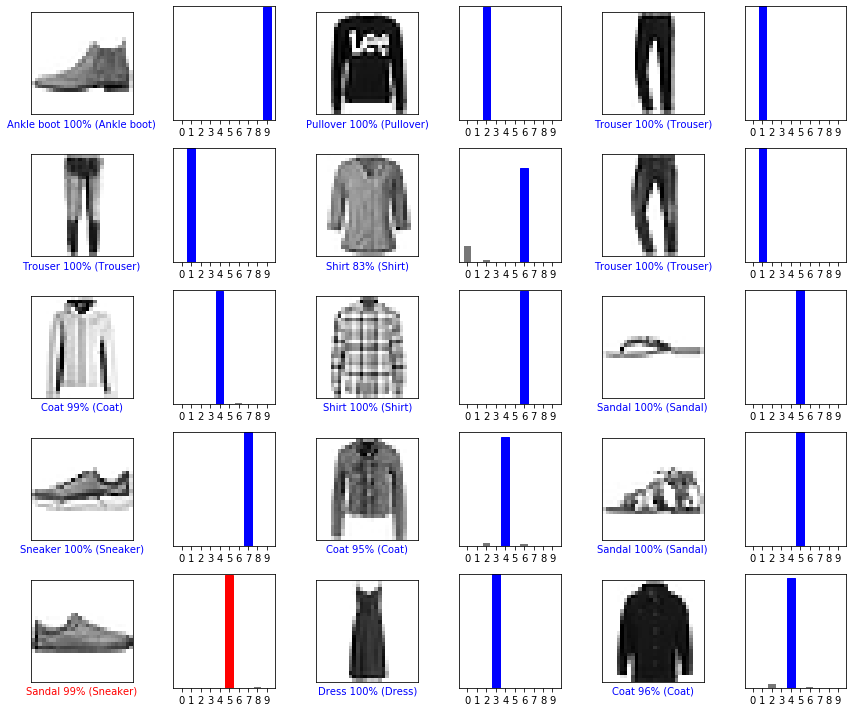

In [12]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()